# Validation & SHAP plot

## 1. Importing libraries

In [4]:
#importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, Matern, ConstantKernel, ExpSineSquared, RBF, RationalQuadratic
from itertools import product
from scipy.optimize import minimize
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.model_selection import LeavePOut
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import norm
import random
import time
import math

## 2. Loading & Preprocessing

In [6]:
# Load the spreadsheet
file_path = 'Entropy-screened BO dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

# Renaming columns for clarity
data.columns = ['Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Mo', 'Objective']

# Preprocessing
X = data[['Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Mo']].values
y = data['Objective'].values
X = (X)/100

## 3. Model fitting

In [8]:
#fitting
kernel = 1.0 * Matern(nu=1.5) 
gp = GaussianProcessRegressor(kernel=kernel, alpha = 0.15, n_restarts_optimizer=1000, normalize_y = True)
gp.fit(X, y)
gp.kernel_

1.02**2 * Matern(length_scale=0.173, nu=1.5)

In [9]:
#Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
gp.fit(X_train,y_train)

GaussianProcessRegressor(alpha=0.15,
                         kernel=1**2 * Matern(length_scale=1, nu=1.5),
                         n_restarts_optimizer=1000, normalize_y=True)

## 4. Validation

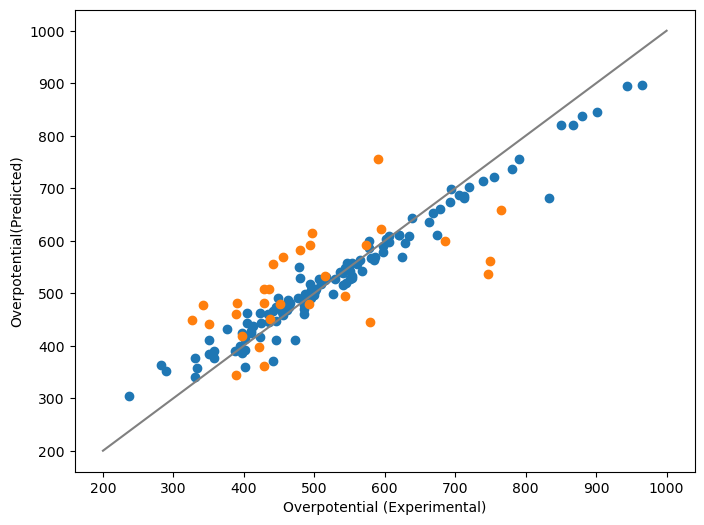

In [11]:
plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.plot([200, 1000], [200,1000], 'gray')
ax.scatter(y_train, gp.predict(X_train))
ax.scatter(y_test, gp.predict(X_test))
ax.set_xlabel('Overpotential (Experimental)')
ax.set_ylabel('Overpotential(Predicted)')

plt.show()

In [12]:
test_RMSE = np.sqrt(sum((gp.predict(X_test)-y_test.mean())**2)/len(X_test))
test_RMSE

91.04730779533509

In [13]:
r2 = sum((gp.predict(X)-y.mean())**2)/sum((y-y.mean())**2)
r2

0.6943984685965129

## 5. SHAP value visualization

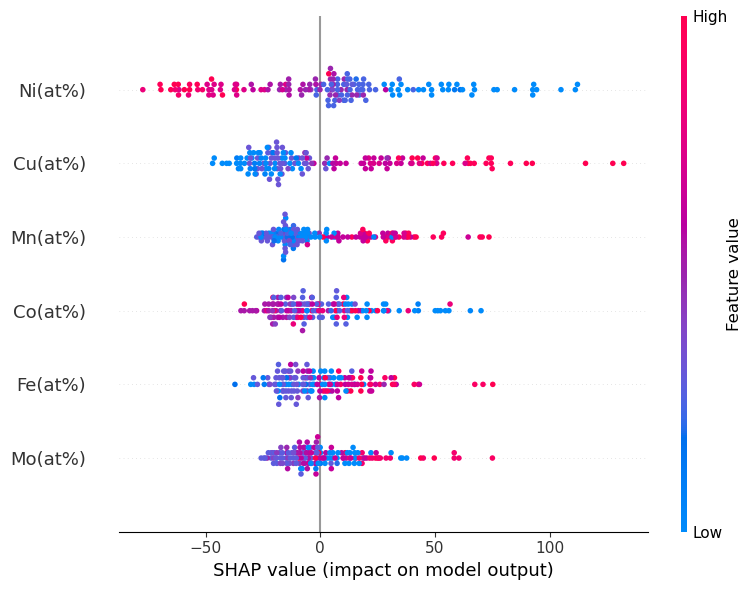

In [15]:
#SHAP model explanation
explainer = shap.Explainer(gp.predict,X)
shap_values = explainer(X)                                 ## bar plot
shap.summary_plot(shap_values, X, plot_size = [8,6], feature_names = ['Mn(at%)', 'Fe(at%)', 'Co(at%)', 'Ni(at%)', 'Cu(at%)', 'Mo(at%)'])  